두 번째 랩은 Pandas와 Numpy를 활용하여 Rating Matrix 또는 Frequent Matrix를 만드는 것입니다. 추천 시스템 개발 등 머신러닝을 하다 보면 누가, 어떤 물건(또는 서비스)를 얼마나 이용하고 평가 하였는 가를 Matrix 형태로 변형하여 분석하는 일이 많은데 이를 위한 전처리 과정이 필요합니다. 흔한 예제로 생각해보면 영화를 본 사용자들이 각 영화를 평가한 별점 점수를 Matrix 형태로 표현하는 것이 있습니다. 일반적으로 데이터 베이스는 저장 공간의 효율성을 위해 Matrix 형태로 저장하는 것이 아니라 Event과 발생한 정보를 Row 단위로 저장합니다. 이렇게 DB에 쌓인 정보를 Matrix로 변환하는 게 이번 랩의 목표입니다. 실제 데이터의 변환은 아래 그림과 같습니다.

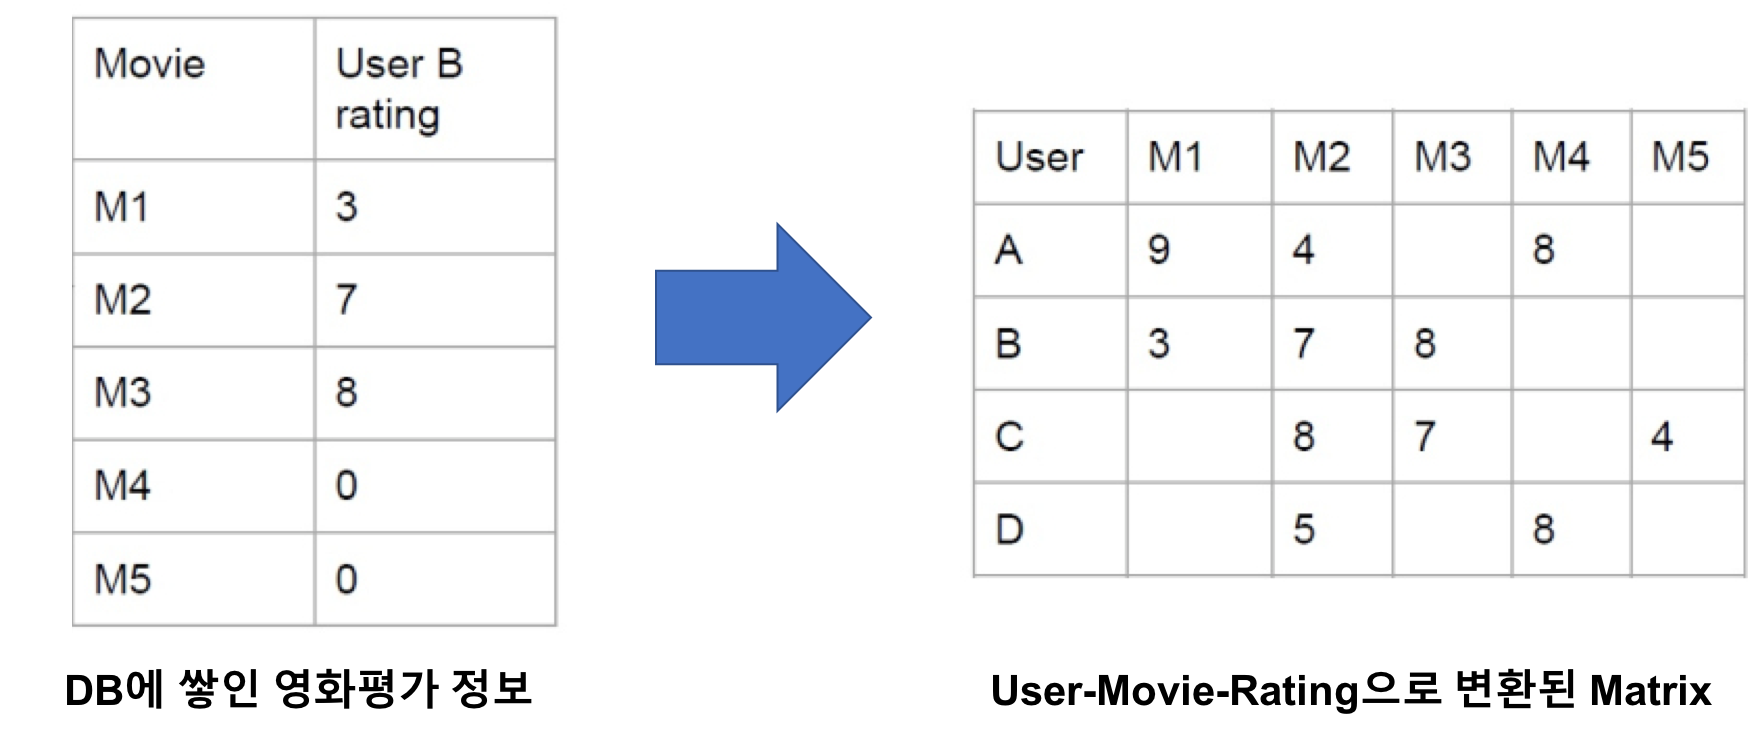

In [1]:
import numpy as np
import pandas as pd

## 1. get_rating_matrix
첫 번째 함수는 Rating Matix을 만드는 것입니다. Rating Matrix는 영화, 책 처럼 사용자가 제품에 대한 평가를 Matrix 형태로 표현한 것입니다. 저희는 movie_rating.csv라는 파일을 활용하여 rating matrix를 구성합니다. movie_rating.csv는 아래처럼 구성됩니다.

source  |target   | rating
--|---|--
Mick LaSalle|Superman Returns|3.0
Mick LaSalle|The Night Listener|3.0
Claudia Puig|Snakes on a Plane|3.5
Claudia Puig|Just My Luck|3.0
Claudia Puig|The Night Listener|4.5
Lisa Rose|Lady in the Water|2.5
Lisa Rose|Snakes on a Plane|3.5

본 랩에서 다루는 모든 csv파일의 column은 source, target으로 구성되며, source는 row의 index 정보가, target는 column의 기준 정보가 된다. rating 정보는 get_rating_matrix 함수에서만 사용되며, 사용자가 영화에 대한 평가를 정보를 담고 있다.

본 랩의 목적은 위 테이블과 같이 구성된 정보를 Matrix 형태로 바꾸는 것이다. Matrix 형태로 바꾸는 규칙은 다음과 같다.

- source는 row, target은 column의 기준이 된다.
- source와 target의 정렬된 값을 활용하여 index를 설정한다. 즉 위 Table에서는 Claudia Puig과 row의 0번째 index로 설정된다.
- rating의 정보는 Matrix에서 각 Element 값에 할당된다.
- 생성되는 Matrix Ndarray로 나타난다.
- dict, collection 모듈 등 파이썬의 Built-in Module은 사용할 수 있으나, for 문은 사용할 수 없다.

생성하는 함수의 Template은 아래와 같으며, 입력값은 처리하는 csv 파일의 이름만 넣을 수 있다.

In [4]:
def get_rating_matrix(filename, dtype=np.float32):
    df = pd.read_csv(filename)
    return df.groupby(['source', 'target'])['rating'].sum().unstack().fillna(0)

In [5]:
get_rating_matrix("movie_rating.csv")

target,Just My Luck,Lady in the Water,Snakes on a Plane,Superman Returns,The Night Listener,You Me and Dupree
source,,,,,,
Claudia Puig,3.0,0.0,3.5,0.0,4.5,0.0
Gene Seymour,0.0,3.0,3.5,0.0,3.0,3.5
Jack Matthews,0.0,3.0,4.0,5.0,3.0,3.5
Lisa Rose,3.0,2.5,3.5,3.5,3.0,2.5
Mick LaSalle,2.0,3.0,4.0,3.0,3.0,0.0
Toby,0.0,0.0,4.5,4.0,0.0,0.0


In [12]:
df = pd.read_csv("movie_rating.csv")
df.groupby(['source', 'target'])['rating'].sum()

source         target            
Claudia Puig   Just My Luck          3.0
               Snakes on a Plane     3.5
               The Night Listener    4.5
Gene Seymour   Lady in the Water     3.0
               Snakes on a Plane     3.5
               The Night Listener    3.0
               You Me and Dupree     3.5
Jack Matthews  Lady in the Water     3.0
               Snakes on a Plane     4.0
               Superman Returns      5.0
               The Night Listener    3.0
               You Me and Dupree     3.5
Lisa Rose      Just My Luck          3.0
               Lady in the Water     2.5
               Snakes on a Plane     3.5
               Superman Returns      3.5
               The Night Listener    3.0
               You Me and Dupree     2.5
Mick LaSalle   Just My Luck          2.0
               Lady in the Water     3.0
               Snakes on a Plane     4.0
               Superman Returns      3.0
               The Night Listener    3.0
Toby           Snakes o

In [13]:
df.groupby(['source', 'target'])['rating'].first()

source         target            
Claudia Puig   Just My Luck          3.0
               Snakes on a Plane     3.5
               The Night Listener    4.5
Gene Seymour   Lady in the Water     3.0
               Snakes on a Plane     3.5
               The Night Listener    3.0
               You Me and Dupree     3.5
Jack Matthews  Lady in the Water     3.0
               Snakes on a Plane     4.0
               Superman Returns      5.0
               The Night Listener    3.0
               You Me and Dupree     3.5
Lisa Rose      Just My Luck          3.0
               Lady in the Water     2.5
               Snakes on a Plane     3.5
               Superman Returns      3.5
               The Night Listener    3.0
               You Me and Dupree     2.5
Mick LaSalle   Just My Luck          2.0
               Lady in the Water     3.0
               Snakes on a Plane     4.0
               Superman Returns      3.0
               The Night Listener    3.0
Toby           Snakes o

In [14]:
df.groupby(['source', 'target'])['rating'].sum().unstack()

target,Just My Luck,Lady in the Water,Snakes on a Plane,Superman Returns,The Night Listener,You Me and Dupree
source,,,,,,
Claudia Puig,3.0,NaN,3.5,NaN,4.5,NaN
Gene Seymour,NaN,3.0,3.5,NaN,3.0,3.5
Jack Matthews,NaN,3.0,4.0,5.0,3.0,3.5
Lisa Rose,3.0,2.5,3.5,3.5,3.0,2.5
Mick LaSalle,2.0,3.0,4.0,3.0,3.0,NaN
Toby,NaN,NaN,4.5,4.0,NaN,NaN


## 2. get_frequent_matrix
두 번째 함수는 얼마나 빈번하게 제품을 구매했는지를 표현하는 Frequent Matrix를 만드는 것 입니다. Frequent Matrix는 사용자가 특정 제품을 구매한 횟수를 기록하는 Matrix입니다. 저희가 제공하는 csv파일은 1000i.csv라는 파일로 아래처럼 구성되어 있습니다.

source  |target   
--|---
source|target
3|7
4|15
2|49
5|44
1|1
2|19
4|22
4|34
4|40
5|31
4|17
5|16
2|43
5|20
3|48

본 함수에서는 기존 함수와 달리 Rating column이 없습니다. 대신 source와 target의 조합이 한 개 이상으로 중복될 수 있고, 이것을 Frequent로 처리해야 합니다. 즉 Rating이 명시적으로 있는게 아니라 데이터를 통해 Frequent를 찾아내는 것이 목적입니다. Matrix 형태로 바꾸는 규칙은 다음과 같습니다.

- source는 row, target은 column의 기준이 된다.
- source와 target의 정렬된 값을 활용하여 index를 설정한다. 즉 위 Table에서는 1은 row의 0번째 index로 설정된다.
- Source와 Target이 출현한 정보는 Frequent로 Matrix에서 각 Element 값에 할당되어야 한다.
- 생성되는 Matrix Ndarray로 나타내며, dtype은 np.float32
- dict, collection 모듈 등 파이썬의 Built-in Module은 사용할 수 있으나, for 문은 사용할 수 없다.  

생성하는 함수의 Template은 아래와 같으며, 입력값은 처리하는 csv 파일의 이름만 넣을 수 있다.

In [7]:
def get_frequent_matrix(filename, dtype=np.float32):
    df = pd.read_csv(filename)
    df['rating'] = 1
    return df.groupby(["source","target"])['rating'].sum().unstack().fillna(0)

In [8]:
get_frequent_matrix("1000i.csv")

target,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
source,,,,,,,,,,,,,,,,,,,,,
1,19,17,14,11,17,25,7,22,5,18,...,15,14,20,9,12,16,11,9,11,12
2,20,16,10,15,17,18,10,13,5,19,...,13,12,15,9,13,16,16,10,16,9
3,12,16,13,19,23,19,5,14,5,18,...,10,14,10,17,15,16,11,17,9,11
4,14,14,19,11,11,18,7,16,7,17,...,9,16,18,12,16,16,26,16,12,20
5,13,7,8,15,13,16,3,19,11,12,...,11,10,16,8,13,20,14,18,21,3
